In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import base_psx.base


def func(x):
    return x**2 + np.cos(x + 2)

def dfunc(x):
    return 2*x - np.sin(x + 2)

def func2(x):
    return np.sin(x)

def dfunc2(x):
    return np.cos(x)

R, Epsilon, delta_R, delta_Epsilon = 10, 10, 0.2, 0.2
rs, epsilons = base_psx.base.generate_params(R, Epsilon, delta_R, delta_Epsilon)
x = np.random.uniform(0, 10)
approx_gradients_info = base_psx.base.optimize(rs, epsilons, func2, dfunc2(x))
approx_gradients, c_rs, c_epsilons = zip(*approx_gradients_info)
approx_gradients = np.asarray(approx_gradients)
index_min_absolute_error, absolute_errors = base_psx.base.calculate_error(approx_gradients, dfunc2(x))
print(absolute_errors[index_min_absolute_error])


0.0004501849031980365


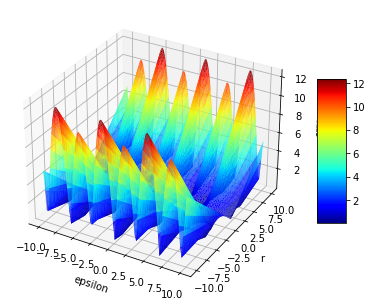

In [36]:
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_trisurf(np.asarray(c_epsilons), np.asarray(c_rs), np.asarray(absolute_errors), cmap=cm.jet, linewidth=0.1)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('epsilon')
ax.set_ylabel('r')
ax.set_zlabel('error')
plt.show()

In [31]:
relative_errors, nRs, nEpslilons = [], [], []
R, Epsilon= 10, 10
for nR in range(2, 30, 1):
    for nEpslilon in range(2, 30, 1):
        delta_R = 2*R / nR
        delta_Epsilon = 2*Epsilon / nEpslilon

        rs, epsilons = base_psx.base.generate_params(R, Epsilon, delta_R, delta_Epsilon)
        x = np.random.uniform(0, 10)
        approx_gradients_info = base_psx.base.optimize(rs, epsilons, func2, dfunc2(x))
        approx_gradients, c_rs, c_epsilons = zip(*approx_gradients_info)
        approx_gradients = np.asarray(approx_gradients)
        index_min_absolute_error, absolute_errors = base_psx.base.calculate_error(approx_gradients, dfunc2(x))
        relative_errors.append(absolute_errors[index_min_absolute_error] / dfunc2(x) * 100)
        nRs.append(delta_R)
        nEpslilons.append(delta_Epsilon)

In [34]:
print(relative_errors[0: 10])

[728.7654587404243, -100.0, 110.35434340313759, 100.0, 1198.469316779116, -100.0, -568.997176310321, -100.0, 511.1595990147676, 100.0]


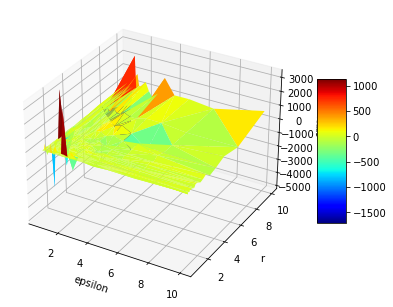

In [33]:
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_trisurf(np.asarray(nEpslilons), np.asarray(nRs), np.asarray(relative_errors), cmap=cm.jet, linewidth=0.1)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('epsilon')
ax.set_ylabel('r')
ax.set_zlabel('error')
plt.show()

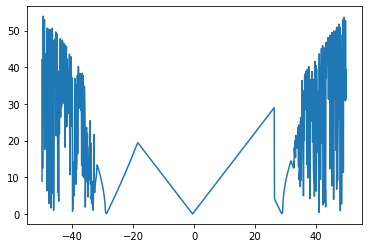

In [10]:
import numpy as np
from matplotlib import pyplot as plt
def f(x):
    return np.sin(x)
def df(x):
    return np.cos(x)
def dloss(r, s, x):
    return r*(np.cos(x + s) + np.cos(x - s))
def psx(f, r, s, x):
    return r*(f(x + s) - f(x - s))
xs = np.random.uniform(low = 0, high = 2*np.pi, size = (100))
xs = np.ones(300)
dfs = []
for x in xs:
    dfs.append(df(x))

r = -50
rs = []
s = -np.pi/4
losses = []
min_losses = []
for i in range(0, 1000):
    r += 0.1
    for i in range(0, 300):
        loss = np.abs(psx(f, r, s, xs[i]) - dfs[i])
        losses.append(loss)
        dlosss = dloss(r, s, xs[i])
        
        s = s + 0.1*dlosss
    rs.append(r)
    min_losses.append(losses[-1]) 
plt.plot(rs, min_losses)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
def f(x):
    return np.sin(x)
def df(x):
    return np.cos(x)
def dloss(r, s, x):
    return r*(np.cos(x + s) + np.cos(x - s))
def psx(f, r, s, x):
    return r*(f(x + s) - f(x - s))
xs = np.random.uniform(low = 0, high = 2*np.pi, size = (100))
xs = np.ones(300)
dfs = []
for x in xs:
    dfs.append(df(x))

r = -50
rs = []
s = -np.pi/4
losses = []
min_losses = []
for i in range(0, 1000):
    r += 0.1
    for i in range(0, 300):
        loss = np.abs(psx(f, r, s, xs[i]) - dfs[i])
        losses.append(loss)
        dlosss = dloss(r, s, xs[i])
        
        s = s + 0.1*dlosss
    rs.append(r)
    min_losses.append(losses[-1]) 
plt.plot(rs, min_losses)

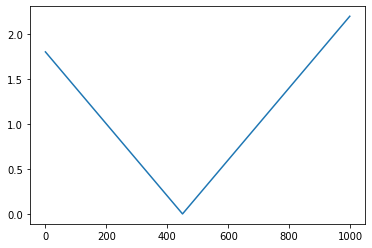

In [30]:
import numpy as np
from matplotlib import pyplot as plt
def f(x):
    return x**2
def df(x):
    return 2*x
def dS(r, s, x):
    return -4*r*x

def psx(f, r, s, x):
    return r*(f(x + s) - f(x - s))
xs = np.random.uniform(low = 0, high = 2*np.pi, size = (100))
xs = np.ones(1000)
dfs = []
for x in xs:
    dfs.append(df(x))

r = 1/2
s = 0.1
rs = []
losses = []
for i in range(0, 1000):
    loss = np.abs(dfs[i] - psx(f, r, s, xs[i]))
    losses.append(loss)
    s = s - 0.001*dS(r, s, xs[i])

plt.plot(range(0, 1000), losses)